In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [135]:
train=pd.read_csv('Titanic_train.csv')
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
1,1,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
2,3,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
3,4,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
4,5,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S


In [136]:
train.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            153
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          606
Embarked         2
dtype: int64

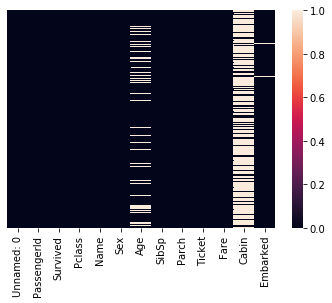

In [137]:
sns.heatmap(train.isnull(), yticklabels = False)

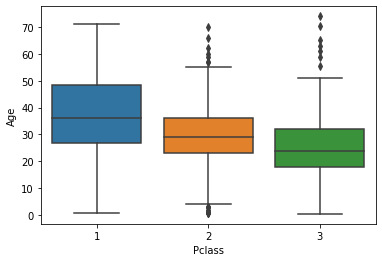

In [138]:
sns.boxplot(x ='Pclass', y = 'Age', data= train)

In [139]:
train.dropna(inplace = True)

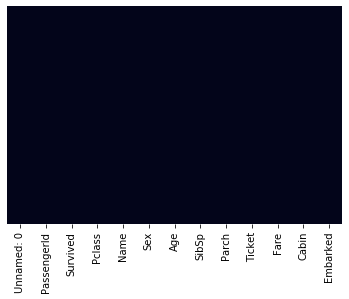

In [140]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False)

In [141]:
train.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [142]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
4,5,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
6,8,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
9,13,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S
16,21,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [143]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
sex.head(5)

,male
0,1
4,1
6,0
9,1
16,1


In [144]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head(5)

,Q,S
0,0,1
4,0,1
6,0,0
9,0,1
16,0,0


In [145]:
pcl = pd.get_dummies(train['Pclass'], drop_first = True)
pcl.head(5)

,2,3
0,0,0
4,0,0
6,0,0
9,0,0
16,0,0


In [146]:
train = pd.concat([train, sex,pcl,embark], axis =1)

In [147]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,Q,S
0,0,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,1,0,0,0,1
4,5,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,1,0,0,0,1
6,8,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C,0,0,0,0,0
9,13,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,1,0,0,0,1
16,21,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,1,0,0,0,0


In [148]:
train.columns

Index([ 'Unnamed: 0', 'PassengerId',    'Survived',      'Pclass',
              'Name',         'Sex',         'Age',       'SibSp',
             'Parch',      'Ticket',        'Fare',       'Cabin',
          'Embarked',        'male',             2,             3,
                 'Q',           'S'],
      dtype='object')

In [149]:
train.drop(['Unnamed: 0', 'PassengerId','Embarked','Ticket','Name','Ticket','Sex', 'Cabin','Pclass'], inplace = True, axis =1)

In [150]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,47.0,0,0,38.5000,1,0,0,0,1
4,1,42.0,1,0,52.5542,1,0,0,0,1
6,1,40.0,1,1,134.5000,0,0,0,0,0
9,0,29.0,0,0,30.0000,1,0,0,0,1
16,0,71.0,0,0,34.6542,1,0,0,0,0


In [151]:
X = train.drop('Survived', axis= 1)
y = train['Survived']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [161]:
from sklearn.linear_model import LogisticRegression

In [165]:
Logmodel = LogisticRegression()

In [166]:
Logmodel.fit(X_train, y_train)

C:\Users\COE-AI-30\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
predictions = Linmodel.predict(X_test)

In [168]:
from sklearn.metrics import classification_report

In [169]:
from sklearn.metrics import confusion_matrix

In [170]:
confusion_matrix(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [171]:
classification_report(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets